In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)

input_data = (input_data - np.pi) / np.pi # -1.0 ~ 1.0
n_data = len(correct_data)

In [3]:
n_in = 1
n_mid = 3
n_out = 1

In [4]:
wb_width = 0.01
eta = 0.1
epoch = 2001
interval = 200

In [5]:
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)

    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u))

    def backward(self, grad_y):
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)

        self.grad_x = np.dot(delta, self.w.T)

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)

    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u

    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)

        self.grad_x = np.dot(delta, self.w.T)

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [7]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

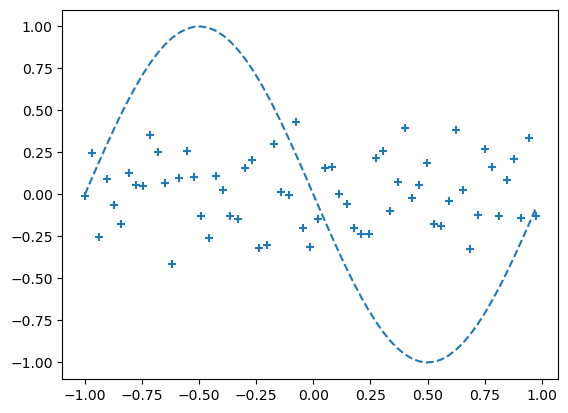

Epoch:0/2001 Error:0.27497966917431965


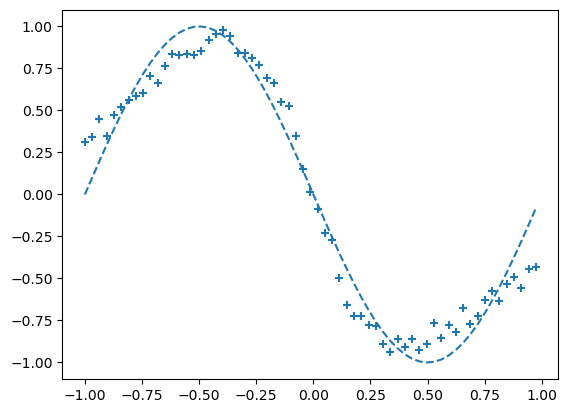

Epoch:200/2001 Error:0.009175993962302292


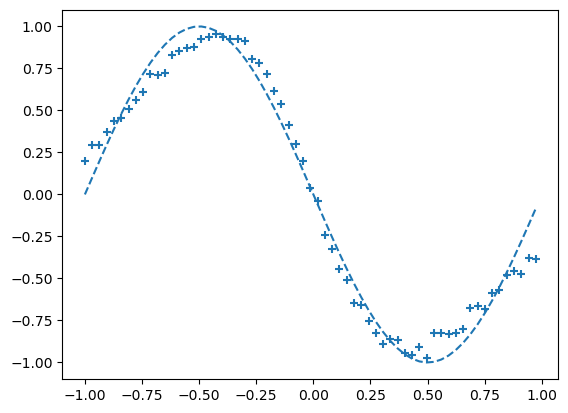

Epoch:400/2001 Error:0.005349336692231872


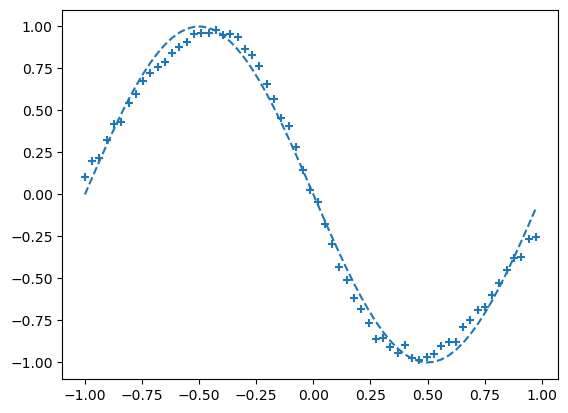

Epoch:600/2001 Error:0.0020119784213124435


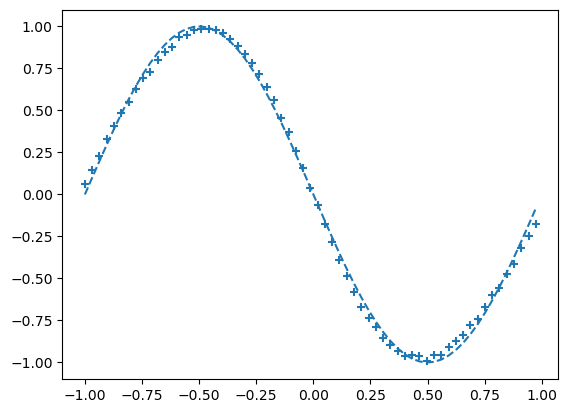

Epoch:800/2001 Error:0.0006670138401529841


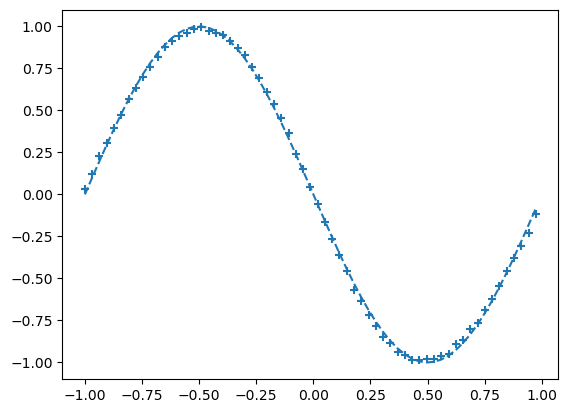

Epoch:1000/2001 Error:0.00019497651473163806


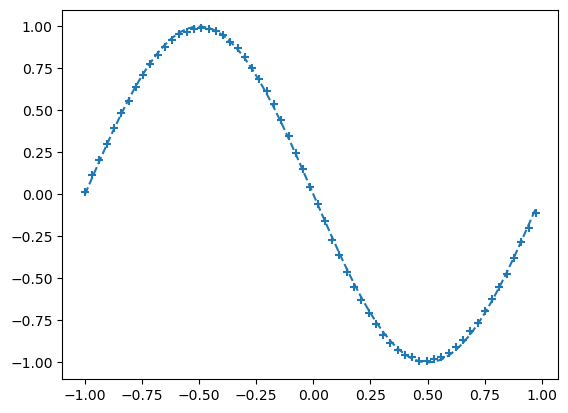

Epoch:1200/2001 Error:7.241210029924803e-05


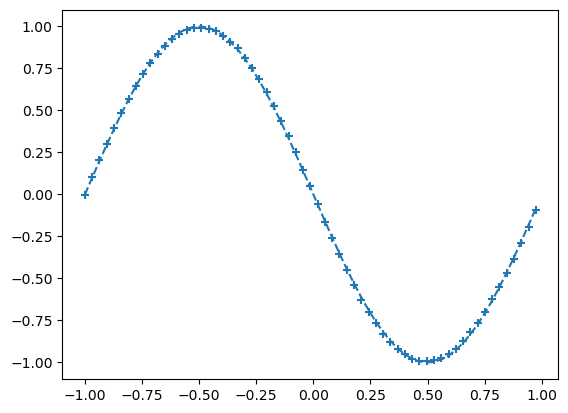

Epoch:1400/2001 Error:2.9472370450630737e-05


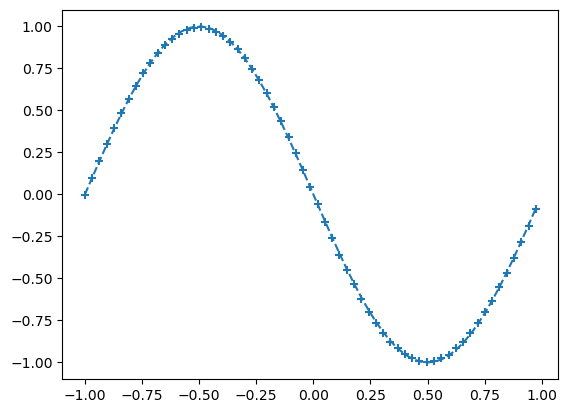

Epoch:1600/2001 Error:1.5376536728332602e-05


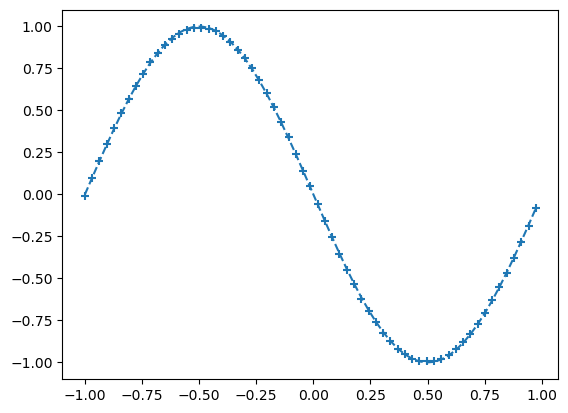

Epoch:1800/2001 Error:1.0497837121833574e-05


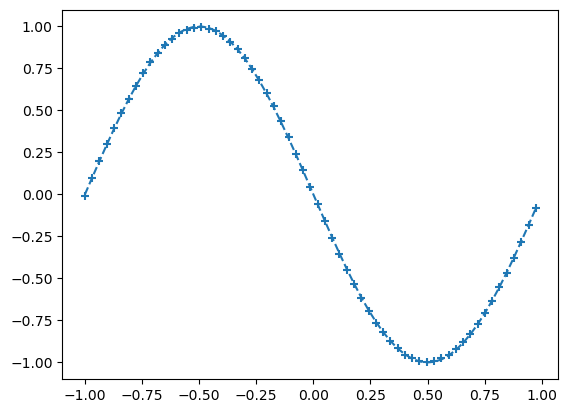

Epoch:2000/2001 Error:9.013593775822034e-06


In [8]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    total_error = 0;
    plot_x = []
    plot_y = []

    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]

        middle_layer.forward(x.reshape(1, 1))
        output_layer.forward(middle_layer.y)

        output_layer.backward(t.reshape(1, 1))
        middle_layer.backward(output_layer.grad_x)

        middle_layer.update(eta)
        output_layer.update(eta)

        if i % interval == 0:
            y = output_layer.y.reshape(-1)

            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))
            plot_x.append(x)
            plot_y.append(y)

    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        print("Epoch:" + str(i) + "/" + str(epoch), 
              "Error:" + str(total_error / n_data))